## Load Required files

In [1]:
import requests
from pandas.io.json import json_normalize
import dash
import dash_table
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from dash.dependencies import Input, Output
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
#------------------------Read in data ---------------------------
#SA Cummulative
df1 = pd.read_csv('./../data/external/global_data.csv')
df = pd.read_csv('./../data/external/SA_hourly_update.csv')

#Provincial cummulative
df_day=pd.read_csv('./../data/external/provincial_cumulative.csv')

# Commulative death per province 

df_death = pd.read_csv('./../data/external/provincial_death.csv')

#Update for the most recent  hours: SA Cases
df.tail()

,Unnamed: 0,cases,todayCases,deaths,todayDeaths,recovered,active,critical,timestamp
1294,1294,10015,0,194,0,4173,5648,77,2020-05-11T09:00:00.177Z
1295,1295,10015,0,194,0,4173,5648,77,2020-05-11T10:00:00.267Z
1296,1296,10015,0,194,0,4173,5648,77,2020-05-11T11:00:00.220Z
1297,1297,10015,0,194,0,4173,5648,77,2020-05-11T12:00:00.280Z
1298,1298,10015,0,194,0,4173,5648,77,2020-05-11T13:00:00.182Z


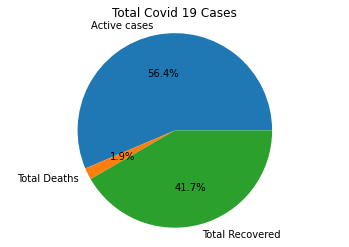

In [3]:
import matplotlib.pyplot as plt

conv  = df.tail(1)
Tasks = [int(conv.active),int(conv.deaths),int(conv.recovered)]

my_labels = 'Active cases','Total Deaths','Total Recovered'
my_colors = ['lightblue','lightsteelblue','silver']
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.title('Total Covid 19 Cases')
plt.axis('equal')
plt.show()

In [4]:
#Drop unwanted columns
# Provincial cases dataset
df_day = df_day.drop(['source','Unnamed: 0','YYYYMMDD'],axis = 1)
df_day = df_day.dropna()
# Provincial cases dataset
df_death = df_death.drop(['source','Unnamed: 0','YYYYMMDD'],axis = 1)
df_death = df_death.dropna()

In [5]:

#Commulative cases by province


fig_comm = go.Figure()
fig_comm.add_trace(
    go.Scatter(
        y=df_day['EC'],
        x=df_day.date,
        name= 'EC'
    ))
fig_comm.add_trace(
    go.Scatter(
        y=df_day['WC'],
        x=df_day.date,
        name= 'WC'
    ))
fig_comm.add_trace(
    go.Scatter(
        y=df_day['FS'],
        x=df_day.date,
        name= 'FS'
    ))
fig_comm.add_trace(
    go.Scatter(
        y=df_day['GP'],
        x=df_day.date,
        name= 'GP'
    ))
fig_comm.add_trace(
    go.Scatter(
        y=df_day['KZN'],
        x=df_day.date,
        name= "KZN"
    ))
fig_comm.add_trace(
    go.Scatter(
        y=df_day['NW'],
        x=df_day.date,
        name= 'NW'
    ))
fig_comm.add_trace(
    go.Scatter(
        y=df_day['LP'],
        x=df_day.date,
        name= 'LP'
    ))
fig_comm.add_trace(
    go.Scatter(
        y=df_day['MP'],
        x=df_day.date,
        name= 'MP'
    ))
fig_comm.add_trace(
    go.Scatter(
        y=df_day['NC'],
        x=df_day.date,
        name= 'NC'
    ))
fig_comm.add_trace(
    go.Scatter(
        y=df_day['UNKNOWN'],
        x=df_day.date,
        name='Unlocated'
    ))
# fig_comm.add_trace(
#     go.Scatter(
#         y=df_day['total'],
#         x=df_day.date,
#         name='Total Confirmed in SA'
#     ))

fig_comm.update_layout(hovermode='x',
                       title = 'Commulative confirmed cases by province',
                       xaxis=dict(
                         rangeslider=dict(
                             visible = True),
                           
       
                       
    ))


In [6]:
# df_day  =df.iloc[:, lambda df: [1, 2]]
import plotly.offline as py
import plotly.graph_objs as go
# py.iplot([{
#     'x': df_day.date,
#     'y': df_day[col],
#     'name': col
# }  for col in df_day.columns], )

In [7]:
df_day.head()

,date,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total
0,05-03-2020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,07-03-2020,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,08-03-2020,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,09-03-2020,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,11-03-2020,0.0,0.0,5.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,13


In [8]:


#Commulative deaths by province


fig = go.Figure()
fig_comm.add_trace(
    go.Scatter(
        y=df_death['EC'],
        x=df_death.date,
        name= 'EC'
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['WC'],
        x=df_death.date,
        name= 'WC'
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['FS'],
        x=df_death.date,
        name= 'FS'
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['GP'],
        x=df_death.date,
        name= 'GP'
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['KZN'],
        x=df_death.date,
        name= "KZN"
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['NW'],
        x=df_death.date,
        name= 'NW'
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['LP'],
        x=df_death.date,
        name= 'LP'
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['MP'],
        x=df_death.date,
        name= 'MP'
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['NC'],
        x=df_death.date,
        name= 'NC'
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['UNKNOWN'],
        x=df_death.date,
        name='Unlocated'
    ))
# fig.add_trace(
#     go.Scatter(
#         y=df_death['total'],
#         x=df_death.date,
#         name='Total Confirmed in SA'
#     ))

fig.update_layout(hovermode='x',
                       title = 'Commulative Death cases by province',
                       xaxis=dict(
                         rangeslider=dict(
                             visible = True),
                           
       
                       
    ))


In [9]:
#SA commulative data graph

fig = go.Figure()
fig.add_trace(go.Scatter(x = df.timestamp,y= df.active, name = 'Active Cases in SA'))
fig.update_layout(title = 'Commulative confirmed cases in SA as 17/03/2020')
fig.show()

In [10]:
df1 = df1[df1.Country=='South Africa']

In [11]:
#Summing per column
tot_cases = df1.TotalConfirmed.sum()
nw_cases = df1.NewConfirmed.sum()
tot_deaths = df1.TotalDeaths.sum()
new_deaths = df1.NewDeaths.sum()
tot_recover = df1.TotalRecovered.sum()
new_recover = df1.NewRecovered.sum()
diff = tot_cases - nw_cases
diff2 = tot_recover - new_recover
diff3 = tot_deaths - new_deaths 

#Separating columns

#Corona  cases: Total and New
df_tot_cases = df1.loc[:,['Country','TotalConfirmed']].sort_values(by='TotalConfirmed', ascending=False)
df_new_cases = df1.loc[:,['Country','NewConfirmed']]

#Death Cases: Total and New 
df_tot_death = df1.loc[:,['Country','TotalDeaths']]
df_new_death = df1.loc[:,['Country','NewDeaths']]

#Recovery cases: Total and new
df_tot_recover = df1.loc[:,['Country','TotalRecovered']]
df_new_recover = df1.loc[:,['Country','NewRecovered']]
                 

In [12]:
print('Total Cases in SA: {}    Recoveries: {}    Fatalities {}'.format(tot_cases,tot_recover,tot_deaths), sep='nl')

Total Cases in SA: 10015    Recoveries: 4173    Fatalities 194


In [13]:


fig = go.Figure(data=[
    go.Bar( name='GP',x=df_day.date, y=df_day.GP),
    go.Bar( name='WC',x=df_day.date, y=df_day.WC),
    go.Bar( name='KZ',x=df_day.date, y=df_day.KZN),
    go.Bar( name='EC',x=df_day.date, y=df_day.EC),
    go.Bar( name='NW',x=df_day.date, y=df_day.NW),
    go.Bar( name='NC',x=df_day.date, y=df_day.NC),
    go.Bar( name='MP',x=df_day.date, y=df_day.MP),
    go.Bar( name='LP',x=df_day.date, y=df_day.LP),
    go.Bar( name='FS',x=df_day.date, y=df_day.FS),
])
# Change the bar mode
fig.update_layout(barmode='stack',xaxis=dict(
    rangeslider=dict(
        visible = True)))
fig.update_layout(height=600, width=800, title_text="Confirmed Cases by provinces")
                            
fig.show()

In [14]:

fig = go.Figure(data=[
    go.Bar( name='GP',x=df_death.date, y=df_death.GP),
    go.Bar( name='WC',x=df_death.date, y=df_death.WC),
    go.Bar( name='KZ',x=df_death.date, y=df_death.KZN),
    go.Bar( name='EC',x=df_death.date, y=df_death.EC),
    go.Bar( name='NW',x=df_death.date, y=df_death.NW),
    go.Bar( name='NC',x=df_death.date, y=df_death.NC),
    go.Bar( name='MP',x=df_death.date, y=df_death.MP),
    go.Bar( name='LP',x=df_death.date, y=df_death.LP),
    go.Bar( name='FS',x=df_death.date, y=df_death.FS),
])
# Change the bar mode
fig.update_layout(barmode='stack',xaxis=dict(
    rangeslider=dict(
        visible = True)))
fig.update_layout(height=600, width=800, title_text="Confirmed  by provinces")
                            
fig.show()

In [15]:
df_death

,date,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total
0,27-03-2020,0,0,0,0,0,0,0,0,1,0,1
1,28-03-2020,0,0,0,1,0,0,0,0,1,0,2
2,30-03-2020,0,1,0,1,0,0,0,0,1,0,3
3,31-03-2020,0,1,1,2,0,0,0,0,1,0,5
4,03-04-2020,0,1,1,6,0,0,0,0,1,0,9
5,05-04-2020,0,1,1,7,0,0,0,0,2,0,11
6,06-04-2020,0,1,1,7,0,0,0,0,3,0,12
7,07-04-2020,0,1,1,8,0,0,0,0,3,0,13
8,08-04-2020,0,3,3,9,0,0,0,0,3,0,18
9,09-04-2020,0,3,3,9,0,0,0,0,3,0,18
